In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

import glob
import os

from scipy.optimize import curve_fit

color = ['#222222', '#1b98f8']

# data extraction

## cell cycle length

data from Takahashi 1995 *The Cell Cycle of the Pseudostratified Ventricular Epithelium of the Embryonic Murine Cerebral Wall*

2.2028571428571415 7.942857142857142


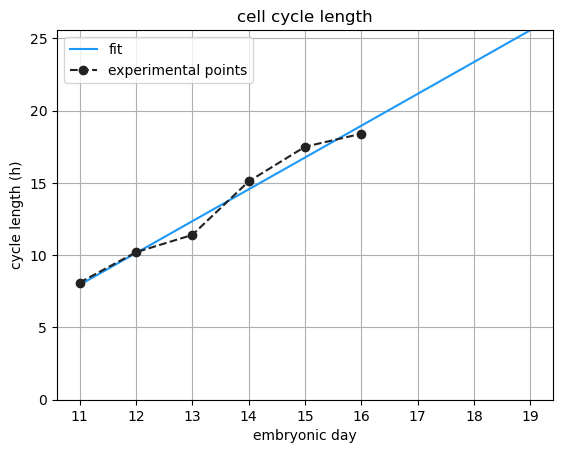

In [22]:
cycle_length = {'day': range(0,6),
                'length': [8.1, 10.2, 11.4, 15.1, 17.5, 18.4]}

cycle_length_df = pd.DataFrame(cycle_length)

slope, intercept = np.polyfit(cycle_length_df['day'], cycle_length_df['length'], 1)
print(slope, intercept)


x_line = np.linspace(0, 8, 100)
y_line = slope * x_line + intercept

plt.plot(x_line + 11, y_line, linestyle='-', color=color[1], label='fit')
plt.plot(cycle_length_df['day'] + 11, cycle_length_df['length'], marker='o', linestyle = '--', color=color[0], label='experimental points')


plt.ylim([0, np.max(y_line)])
plt.title('cell cycle length')
plt.ylabel('cycle length (h)')
plt.xlabel('embryonic day')
plt.title('cell cycle length')
plt.ylabel('cycle length (h)')
plt.xlabel('embryonic day')
plt.grid(True)
plt.legend()

plt.savefig('results/cell_cycle_length.pdf')

## cell cycle exit

data from Takahashi 1996 *The Leaving or Q Fraction of the Murine Cerebral Proliferative Epithelium: A General Model of Neocortical Neuronogenesis*

In [23]:
cycle_exit = {'day': range(1, 6),
              'exit': [0.11, 0.19, 0.36, 0.67, 0.79]}

cycle_exit_df = pd.DataFrame(cycle_exit)

### sigmoid fitting

3.462061384784717 0.9620962951707972


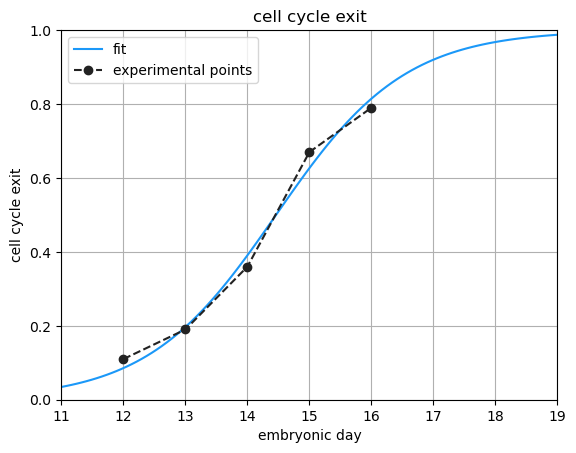

In [24]:
def sigmoid(x, x0, k):
    return 1/(1 + np.exp(-k*(x-x0)))

p0 = [max(cycle_exit['exit']),1] # this is an mandatory initial guess

popt, pcov = curve_fit(sigmoid, cycle_exit['day'], cycle_exit['exit'], p0, method='dogbox')

print(*popt)

x_line = np.linspace(0, 8, 100)
y_line = sigmoid(x_line, *popt)

plt.plot(x_line + 11, y_line, linestyle='-', color=color[1], label='fit')
plt.plot(cycle_exit_df['day'] + 11, cycle_exit['exit'], marker='o', linestyle = '--', color=color[0], label='experimental points')

plt.ylim([0, 1])
plt.xlim([11, 19])
plt.title('cell cycle exit')
plt.ylabel('cell cycle exit')
plt.xlabel('embryonic day')
plt.grid(True)
plt.legend()

plt.savefig('results/cell_cycle_exit.pdf')

## cell proportion

-0.03305688979999996 0.8658511766


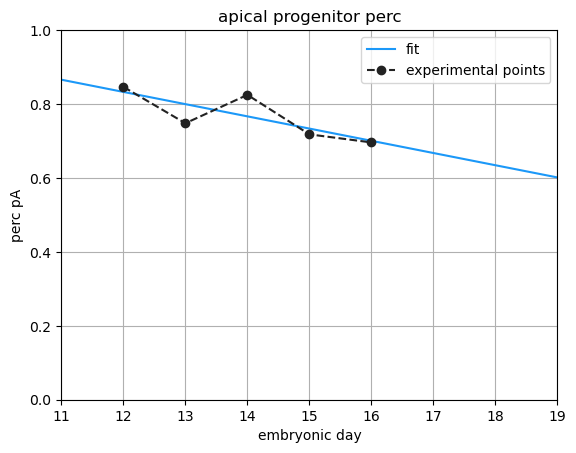

In [25]:
cell_proportion = {'day': range(1,6),
                'perc_a': [84.6406141,
                           74.8027959,
                           82.4842228,
                           71.7981073,
                           69.6145135]}

cell_proportion_df = pd.DataFrame(cell_proportion)
cell_proportion_df['perc_a'] /= 100

slope, intercept = np.polyfit(cell_proportion_df['day'], cell_proportion_df['perc_a'], 1)
print(slope, intercept)

x_line = np.linspace(0, 8, 100)
y_line = slope * x_line + intercept

plt.plot(x_line + 11, y_line, linestyle='-', color=color[1], label='fit')
plt.plot(cell_proportion_df['day'] + 11, cell_proportion_df['perc_a'], marker='o', linestyle = '--', color=color[0], label='experimental points')

plt.ylim([0, 1])
plt.xlim([11, 19])
plt.title('apical progenitor perc')
plt.ylabel('perc pA')
plt.xlabel('embryonic day')
plt.grid(True)
plt.legend()

plt.savefig('results/aP_percent.pdf')

In [26]:
print(-0.03305688979999996*3 + 0.8658511766)

0.7666805072000001
